### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Determine the number of missing values for each column.

In [5]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

More than 99% of the values for the `car` field are `nan`. This field is dropped.

In [6]:
data = data.drop('car', axis=1)

All remaining `nan` values are replaced with `Unknown`.

In [7]:
data = data.fillna('Unknown')

Examine the uniqueness of the values in each column.

In [8]:
data.apply(lambda col: col.nunique())

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      6
CoffeeHouse              6
CarryAway                6
RestaurantLessThan20     6
Restaurant20To50         6
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

The cardnality of each column is very low. Examine the uniques values of each column.

In [9]:
data.apply(lambda col: col.unique())

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $499

Convert some time and expiration to numerical values.

In [10]:
data.time = data.time.replace({'7AM': 7, '10AM': 10, '2PM': 14, '6PM': 18, '10PM': 22})

In [11]:
data.expiration = data.expiration.replace({'2h': 2, '1d': 24})

Rename some values for easier readability and presentation.

In [12]:
data.age = data.age.replace({'50plus': '50 & Above', 'below21': '20 & Under'})

In [13]:
data.has_children = data.has_children.replace({0: 'No', 1: 'Yes'})

In [14]:
data.Bar = data.Bar.replace({
    'never': 'Never', 
    'less1': 'Less than 1', 
    '1~3': '1 to 3', 
    '4~8': '4 to 8', 'gt8': 
    'More than 8'})

In [15]:
data.CoffeeHouse = data.CoffeeHouse.replace({
    'never': 'Never', 
    'less1': 'Less than 1', 
    '1~3': '1 to 3', 
    '4~8': '4 to 8', 
    'gt8': 'More than 8'})

In [16]:
data.CarryAway = data.CarryAway.replace({
    'never': 'Never', 
    'less1': 'Less than 1', 
    '1~3': '1 to 3', 
    '4~8': '4 to 8', 
    'gt8': 'More than 8'})

In [17]:
data.RestaurantLessThan20 = data.RestaurantLessThan20.replace({
    'never': 'Never', 
    'less1': 'Less than 1', 
    '1~3': '1 to 3', 
    '4~8': '4 to 8', 
    'gt8': 'More than 8'})

In [18]:
data.Restaurant20To50 = data.Restaurant20To50.replace({
    'never': 'Never', 
    'less1': 'Less than 1', 
    '1~3': '1 to 3', 
    '4~8': '4 to 8', 
    'gt8': 'More than 8'})

Rename some columns for consistancy.

In [19]:
data = data.rename(columns={
    "Bar": "bar_times",
    "CoffeeHouse": "coffeehouse_times",
    "CarryAway": "carryaway_times",
    "RestaurantLessThan20": "restaurant_lessthan20_times",
    "Restaurant20To50": "restaurant_20to50_times",
    "Y": "accepted"})

In [20]:
data.accepted = data.accepted.replace({0: 'No', 1: 'Yes'})

In [21]:
data.apply(lambda col: col.unique())

destination                                        [No Urgent Place, Home, Work]
passanger                                    [Alone, Friend(s), Kid(s), Partner]
weather                                                    [Sunny, Rainy, Snowy]
temperature                                                         [55, 80, 30]
time                                                         [14, 10, 18, 7, 22]
coupon                         [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                               [24, 2]
gender                                                            [Female, Male]
age                             [21, 46, 26, 31, 41, 50 & Above, 36, 20 & Under]
maritalStatus                  [Unmarried partner, Single, Married partner, D...
has_children                                                           [Yes, No]
education                      [Some college - no degree, Bachelors degree, A...
occupation                  

4. What proportion of the total observations chose to accept the coupon? 



In [22]:
accepted = data.query("accepted == 'Yes'")['accepted'].count() / data['accepted'].count()
print(f'The proportion that accepted the coupon was {accepted * 100:.1f}%.')

The proportion that accepted the coupon was 56.8%.


5. Use a bar plot to visualize the `coupon` column.

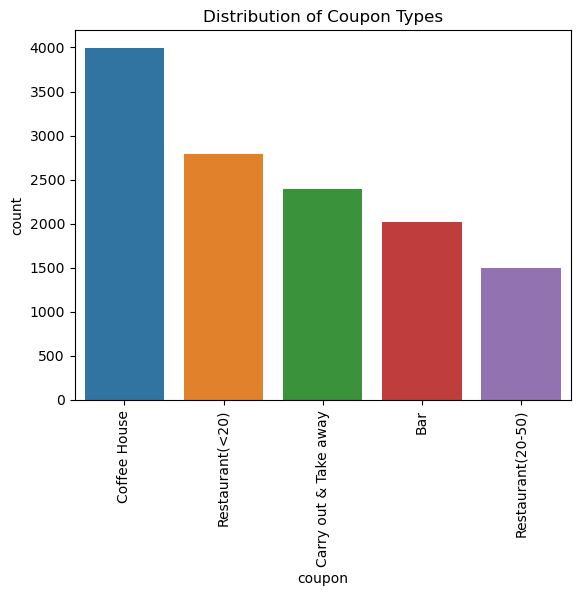

In [23]:
coupons = data.coupon.value_counts().reset_index()
plt.title('Distribution of Coupon Types')
plt.xticks(rotation=90)
sns.barplot(data=coupons, x='coupon', y='count');

6. Use a histogram to visualize the temperature column.

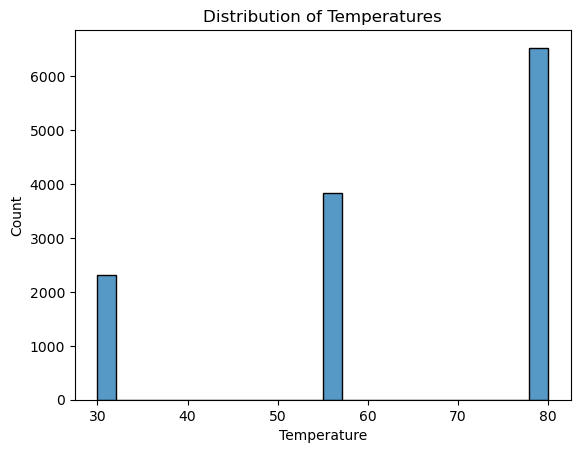

In [24]:
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Count')
sns.histplot(data=data, x="temperature");

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
# Use the query function to filter for recodrds where the coupon field is equal to 'Bar'
bar_coupons = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


Divide the number of bar coupons that were accepted by the total number of bar coupons.

In [26]:
bar_coupons_accepted = bar_coupons.query("accepted == 'Yes'")['accepted'].count()
bar_coupons_total = bar_coupons['accepted'].count()
print(f"{bar_coupons_accepted / bar_coupons_total * 100:.1f}% of the bar coupons were accepted.")

41.0% of the bar coupons were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
bartimes_clause = "(bar_times in ['Never', 'Less than 1', '1 to 3'])"

# Determine the number of bar coupons that were accepted where number of monthly bar visits is 3 or fewer.
q3a_accecpted = bar_coupons.query(bartimes_clause + " and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons where number of monthly bar visits is 3 or fewer.
q3a_total = bar_coupons.query(bartimes_clause)['bar_times'].count()

print(f"{q3a_accecpted / q3a_total * 100:.1f}% of the bar coupons were accepted among those with 3 or fewer monthly bar visits.")

37.1% of the bar coupons were accepted among those with 3 or fewer monthly bar visits.


In [28]:
fourormore_clause = "(bar_times in ['4 to 8', 'More than 8'])"

# Determine the number of bar coupons that were accepted where number of monthly bar visits is 4 or more.
q3b_accecpted = bar_coupons.query(fourormore_clause + " and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons where number of monthly bar visits is 4 or more.
q3b_total = bar_coupons.query(fourormore_clause)['bar_times'].count()

print(f"{q3b_accecpted / q3b_total * 100:.1f}% of the bar coupons were accepted among those with 4 or more monthly bar visits.")

76.9% of the bar coupons were accepted among those with 4 or more monthly bar visits.


The acceptance rate for those who went to a bar 3 or fewer times a month was considerably lower at 37.1% compared to those that went more at 76.9%.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
#  Define the conditional clauses
morethanonce_cluase = "(bar_times in ['1 to 3', '4 to 8', 'More than 8'])"
over25_clause = "(age in ['26', '31', '36', '41', '46', '50 & Above'])"

# Determine the number of bar coupons accepted where the monthly bar visits is more than one and the age is over 25.
q4a_accecpted = bar_coupons.query(morethanonce_cluase + " and " + over25_clause + " and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons where the monthly bar visits is more than one and the age is over 25.
q4a_total = bar_coupons.query(morethanonce_cluase + " and " + over25_clause)['bar_times'].count()

print(f"{q4a_accecpted / q4a_total * 100:.1f}% of the bar coupons were accepted among those with 1 or more monthly bar visits and age 25 or over.")

69.5% of the bar coupons were accepted among those with 1 or more monthly bar visits and age 25 or over.


In [30]:
#  Define the conditional clauses negating the conditions above
lessthanonce_clause = "(bar_times not in ['1 to 3', '4 to 8', 'More than 8'])"
under25_clause = "(age not in ['26', '31', '36', '41', '46', '50 & Above'])"

# Determine the number of bar coupons accepted by all others (applying De Morgan's law)
q4b_accecpted = bar_coupons.query("(" + lessthanonce_clause + " or " +  under25_clause + ") and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons for all others (again, applying De Morgan's law)
q4b_total = bar_coupons.query(lessthanonce_clause + " or " + under25_clause)['bar_times'].count()

print(f"{q4b_accecpted / q4b_total * 100:.1f}% of the bar coupons were accepted among all others.")

33.5% of the bar coupons were accepted among all others.


The acceptance rate for those over 25 that went to a bar more than once a month was much higher at 69.5% compared to all others at 33.5%.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


There was some discussion about the interpretation of this question. Below, there is a comparison of drivers who:
- go to bars more than once a month vs
- had passangers that were not a kid vs
- had occupations other than farming, fishing, or forestry

In [31]:
morethanonce_cluase = "(bar_times in ['1 to 3', '4 to 8', 'More than 8'])"

# Determine the number of bar coupons accepted by those with more than 1 monthly bar visit
q5a_accecpted = bar_coupons.query(morethanonce_cluase + "and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons for those with more than 1 monthly bar visit
q5a_total = bar_coupons.query(morethanonce_cluase)['bar_times'].count()

print(f"{q5a_accecpted / q5a_total * 100:.1f}% of the bar coupons were accepted among drivers with 1 or more monthly bar visits.")

68.8% of the bar coupons were accepted among drivers with 1 or more monthly bar visits.


In [32]:
notakid_clause = "(passanger != 'Kid(s)')"

# Determine the number of bar coupons accepted by those that did not have passangers that were kids
q5b_accecpted = bar_coupons.query(notakid_clause + "and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons for those that did not have passangers that were kids
q5b_total = bar_coupons.query(notakid_clause)['bar_times'].count()

print(f"{q5b_accecpted / q5b_total * 100:.1f}% of the bar coupons were accepted among drivers that did not have passangers that were kids.)")

43.3% of the bar coupons were accepted among drivers that did not have passangers that were kids.)


In [33]:
notfarming_clause = "(occupation != 'Farming Fishing & Forestry')"

# Determine the number of bar coupons accepted by those that that had occupations other than farming, fishing, or forestry
q5c_accecpted = bar_coupons.query(notfarming_clause + " and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons for those that that had occupations other than farming, fishing, or forestry
q5c_total = bar_coupons.query(notfarming_clause)['bar_times'].count()

print(f"{q5c_accecpted / q5c_total * 100:.1f}% of the bar coupons were accepted among those that had occupations other than farming, fishing, or forestry.")

41.0% of the bar coupons were accepted among those that had occupations other than farming, fishing, or forestry.


Drivers that go to bars more than once a month had a considerable higher accpetance rate (68.8%), than those that had passangers that was not a kid (43.3%) and those that were not in farming, fishing, or forestry (41.0%) which were similar.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [34]:
#  Define the conditional clauses
morethanonce_cluase = "(bar_times in ['1 to 3', '4 to 8', 'More than 8'])"
notakid_clause = "(passanger != 'Kid(s)')"
notwidowed_clause = "(maritalStatus != 'Widowed')"

# Determine the number of bar coupons accepted by those that that go to bars more than once a month, 
# had passengers that were not a kid, and were not widowed
q6a_accecpted = bar_coupons.query(morethanonce_cluase + " and " + notakid_clause + " and " + notwidowed_clause + "and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons for those that that go to bars more than once a month, 
# had passengers that were not a kid, and were not widowed
q6a_total = bar_coupons.query(morethanonce_cluase + " and " + notakid_clause + " and " + notwidowed_clause)['bar_times'].count()

print(f"{q6a_accecpted / q6a_total * 100:.1f}% of the bar coupons were accepted among those that go to bars more than once a month, had passengers that were not a kid, and were not widowed.")

71.3% of the bar coupons were accepted among those that go to bars more than once a month, had passengers that were not a kid, and were not widowed.


In [35]:
#  Define the conditional clauses
morethanonce_cluase = "(bar_times in ['1 to 3', '4 to 8', 'More than 8'])"
under30_clause = "(age in ['Under 21', '21', '26'])"

# Determine the number of bar coupons accepted by those that that go to bars more than once a month and are under the age of 30
q6b_accecpted = bar_coupons.query(morethanonce_cluase + " and " + under30_clause + "and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons for those that that go to bars more than once a month and are under the age of 30
q6b_total = bar_coupons.query(morethanonce_cluase + " and " + under30_clause)['bar_times'].count()
print(f"{q6b_accecpted / q6b_total * 100:.1f}% of the bar coupons were accepted among those that go to bars more than once a month and are under the age of 30.")

73.1% of the bar coupons were accepted among those that go to bars more than once a month and are under the age of 30.


In [36]:
#  Define the conditional clauses
cheaprest_cluase = "(restaurant_lessthan20_times in ['4 to 8', 'More than 8'])"
under50k_clause = "(income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])"

# Determine the number of bar coupons accepted by those that that go to cheap restaurants more than 4 times a month
# and income is less than 50K
q6c_accecpted = bar_coupons.query(cheaprest_cluase + " and " + under50k_clause + " and (accepted == 'Yes')")['bar_times'].count()

# Determine the total number of bar coupons for those that that go to cheap restaurants more than 4 times a month 
# and income is less than 50K
q6c_total = bar_coupons.query(cheaprest_cluase + " and " + under50k_clause)['bar_times'].count()

print(f"{q6c_accecpted / q6c_total * 100:.1f}% of the bar coupons were accepted among those that go to cheap restaurants more than 4 times a month and income is less than 50K.")

45.3% of the bar coupons were accepted among those that go to cheap restaurants more than 4 times a month and income is less than 50K.


Drivers that **go to cheap restaurants more than 4 times a month and income is less than 50K** had a considerable lower accpetance rate (45.3%) than the other two groups. Drivers that **go to bars more than once a month, had passengers that were not a kid, and were not widowed** (71.3%) and drivers that **go to bars more than once a month and are under the age of 30** (73.1%) had similar acceptance rates..

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Those that visit bars more than once a month to accept the bar coupons. The likelyhood to accept increases with more frequest monthly bar visits. The analyisis also indicates that those over 25 and those without kids as passangers are also more likely to accept the coupons. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## 1. Focus

This investigation will focus on coupon types with a lower proportion of accepted coupons.

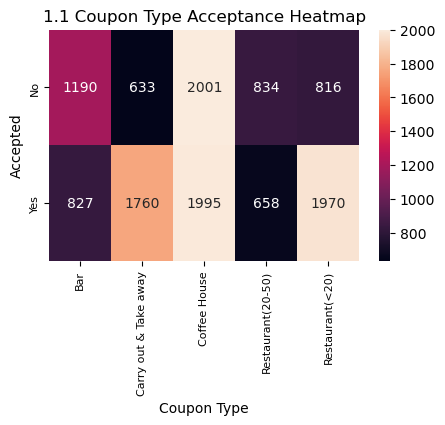

In [37]:
p_data = data.pivot_table(index='accepted', columns='coupon', aggfunc='size', fill_value=0)
plt.subplots(figsize=(5,3))
plot_1_1 = sns.heatmap(p_data, annot=True, fmt=".0f");
plot_1_1.set(xlabel='Coupon Type', ylabel='Accepted', title='1.1 Coupon Type Acceptance Heatmap')
plot_1_1.tick_params(labelsize=8)
plot_1_1.figure.savefig("images/1_1_type_acceptance_heatmap.png", bbox_inches='tight')

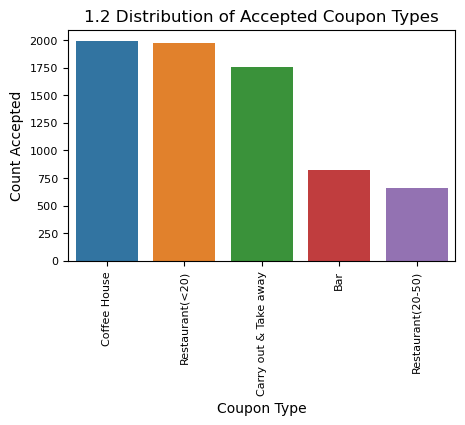

In [38]:
accpeted_coupons = data.query("accepted == 'Yes'").coupon.value_counts().reset_index()

plt.subplots(figsize=(5,3))
plt.xticks(rotation=90)
plot_1_2 = sns.barplot(data=accpeted_coupons, x='coupon', y='count')
plot_1_2.set(xlabel='Coupon Type', ylabel='Count Accepted', title='1.2 Distribution of Accepted Coupon Types')
plot_1_2.tick_params(labelsize=8)
plot_1_2.figure.savefig("images/1_2_accepted_coupon_distribution.png", bbox_inches='tight')

From the plots 1.1 and 1.2 we can see that the exepensive restaurant coupons had the lowest accpetance rates. Although coffee house coupons had the highest acceptance count, less than half were accepted. We will further examine the accpetance of these coupon types.

## 2. Coffee House Coupon Analysis

In [39]:
# Create a dataframe where the coupon type is Coffee House
coffee_coupons = data.query("coupon == 'Coffee House'").reset_index()

We'll examine a series of SNS countplots to find catagory values with high acceptance rates.

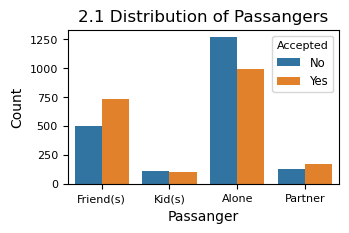

In [40]:
plt.subplots(figsize=(3.5,2))
plot_2_1 = sns.countplot(coffee_coupons, x="passanger", hue="accepted")
plot_2_1.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_2_1.set(xlabel='Passanger', ylabel='Count', title='2.1 Distribution of Passangers')
plot_2_1.figure.savefig("images/2_1_distribution_passangers.png", bbox_inches='tight')

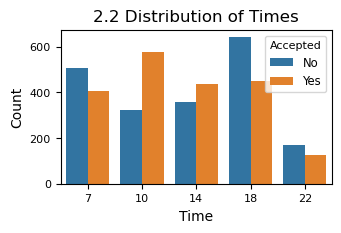

In [41]:
plt.subplots(figsize=(3.5,2))
plot_2_2 = sns.countplot(coffee_coupons, x="time", hue="accepted")
plot_2_2.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_2_2.set(xlabel='Time', ylabel='Count', title='2.2 Distribution of Times')
plot_2_2.figure.savefig("images/2_2_distribution_times.png", bbox_inches='tight')

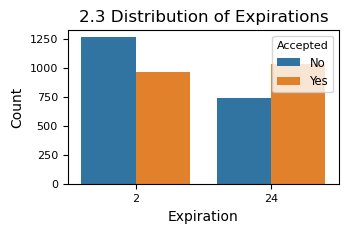

In [42]:
plt.subplots(figsize=(3.5,2))
plot_2_3 = sns.countplot(coffee_coupons, x="expiration", hue="accepted")
plot_2_3.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_2_3.set(xlabel='Expiration', ylabel='Count', title='2.3 Distribution of Expirations')
plot_2_3.figure.savefig("images/2_3_distribution_expirations.png", bbox_inches='tight')

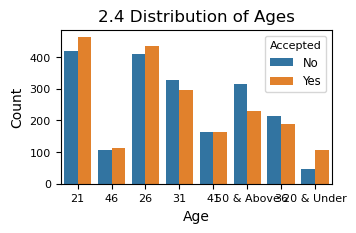

In [43]:
plt.subplots(figsize=(3.5,2))
plot_2_4 = sns.countplot(coffee_coupons, x="age", hue="accepted")
plot_2_4.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_2_4.set(xlabel='Age', ylabel='Count', title='2.4 Distribution of Ages')
plot_2_4.figure.savefig("images/2_4_distribution_ages.png", bbox_inches='tight')

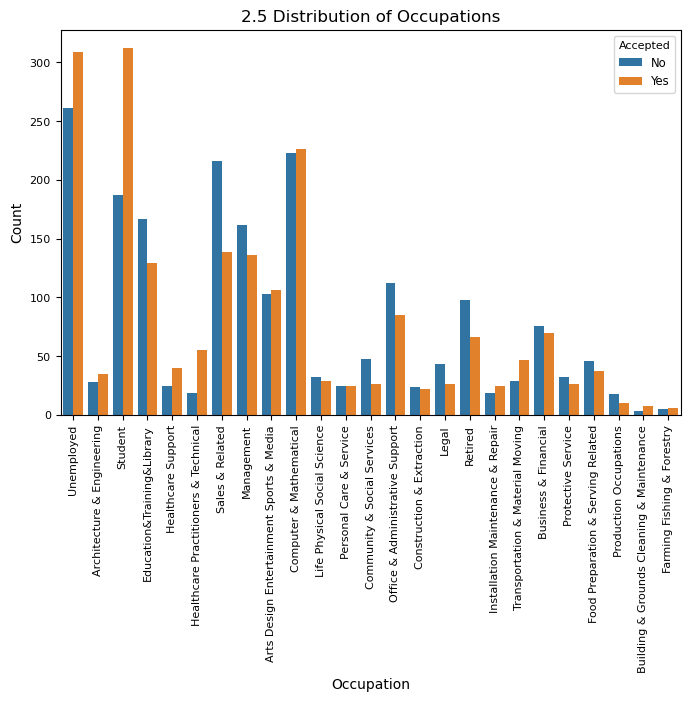

In [44]:
plt.subplots(figsize=(8,5))
plot_2_5 = sns.countplot(coffee_coupons, x="occupation", hue="accepted")
plot_2_5.tick_params(labelsize=8)
plt.xticks(rotation=90)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_2_5.set(xlabel='Occupation', ylabel='Count', title='2.5 Distribution of Occupations')
plot_2_5.figure.savefig("images/2_5_distribution_occupations.png", bbox_inches='tight')

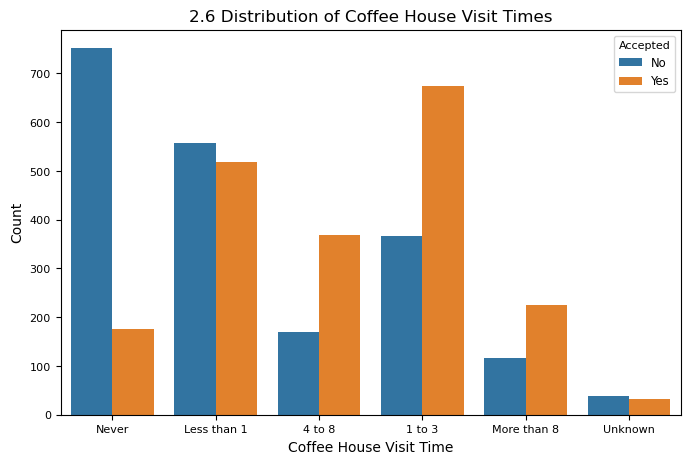

In [45]:
plt.subplots(figsize=(8,5))
plot_2_6 = sns.countplot(coffee_coupons, x="coffeehouse_times", hue="accepted")
plot_2_6.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_2_6.set(xlabel='Coffee House Visit Time', ylabel='Count', title='2.6 Distribution of Coffee House Visit Times')
plot_2_6.figure.savefig("images/2_6_distribution_coffeehousevisits.png", bbox_inches='tight')

From the plots above, we can see there's a higher acceptance rates:
1. for drivers with friends as passangers. (plot 2.1)
2. in the late morning and afternoon. (plot 2.2)
3. for 1 day expirations over 2 hour expirations. (plot 2.3)
4. for drivers aged about 26 and under. (plot 2.4)
5. for students and those unemployed. (plot 2.5)
6. for drivers that visit coffee houses 1 or more times a month. (plot 2.6)

In [46]:
# Create a dataframe containing the records where coffee house coupons were accepted
coffee_coupons_accepted = coffee_coupons.query("accepted == 'Yes'").reset_index()

# Convert the age and coffee house visit times to numeric values
coffee_coupons_accepted.age = coffee_coupons_accepted.age.replace({'50 & Above': '50', '20 & Under': '20'})
coffee_coupons_accepted.age = pd.to_numeric(coffee_coupons_accepted.age)
coffee_coupons_accepted.coffeehouse_times = coffee_coupons_accepted.coffeehouse_times.replace(
    {'Never': '0', 'Less than 1': '0', '1 to 3': '2', '4 to 8': '6', 'More than 8': '9'})
coffee_coupons_accepted = coffee_coupons_accepted.drop(coffee_coupons_accepted[coffee_coupons_accepted['coffeehouse_times'] == 'Unknown'].index)
coffee_coupons_accepted.coffeehouse_times = pd.to_numeric(coffee_coupons_accepted.coffeehouse_times)

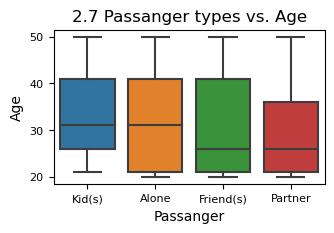

In [47]:
plt.subplots(figsize=(3.5,2))
plot_2_7 = sns.boxplot(coffee_coupons_accepted, x='passanger', y='age')
plot_2_7.tick_params(labelsize=8)
plot_2_7.set(xlabel='Passanger', ylabel='Age', title='2.7 Passanger types vs. Age')
plot_2_7.figure.savefig("images/2_7_box_passanger_age.png", bbox_inches='tight')

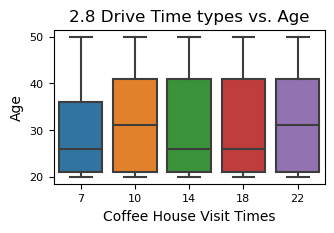

In [48]:
plt.subplots(figsize=(3.5,2))
plot_2_8 = sns.boxplot(coffee_coupons_accepted, x='time', y='age')
plot_2_8.tick_params(labelsize=8)
plot_2_8.set(xlabel='Coffee House Visit Times', ylabel='Age', title='2.8 Drive Time types vs. Age')
plot_2_8.figure.savefig("images/2_8_box_time_age.png", bbox_inches='tight')

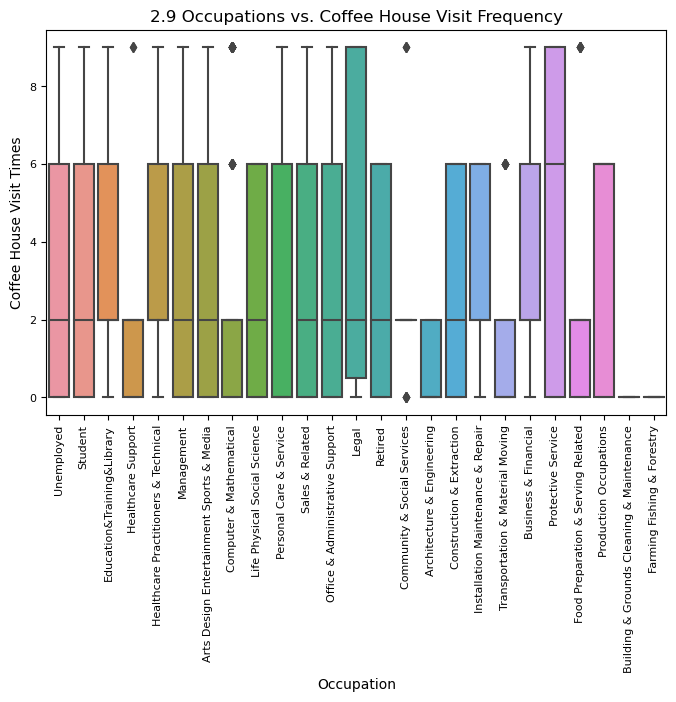

In [49]:
plt.subplots(figsize=(8,5))
plot_2_9 = sns.boxplot(coffee_coupons_accepted, x='occupation', y='coffeehouse_times')
plot_2_9.tick_params(labelsize=8)
plot_2_9.set(xlabel='Occupation', ylabel='Coffee House Visit Times', title='2.9 Occupations vs. Coffee House Visit Frequency')
plt.xticks(rotation=90)
plot_2_9.figure.savefig("images/2_9_occupation_coffeehouse_times.png", bbox_inches='tight')

We can find relationships between those drivers that accepted coffee house coupons. Drivers with friends as passangers tend to be age about 25. Both of these groups were more likely to accept the coffee house coupon (plot 2.7). There's a similar relationship between drive time and age (plot 2.8).

Previously, we determined that those visiting coffee houses more than once a month were likely to accept coupons. Coffee house visits were higher among those with legal and protective service occupations.

## 3. Expensive Restaurant Coupon Analysis

In [50]:
# Create a dataframe where the coupon type is Restaurant(20-50)
exp_rest_coupons = data.query("coupon == 'Restaurant(20-50)'");

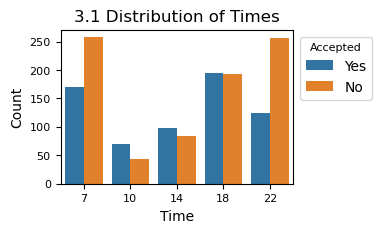

In [51]:
plt.subplots(figsize=(3,2))
plot_3_1 = sns.countplot(exp_rest_coupons, x="time", hue="accepted")
plot_3_1.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
sns.move_legend(plot_3_1, "upper left", bbox_to_anchor=(1, 1))
plot_3_1.set(xlabel='Time', ylabel='Count', title='3.1 Distribution of Times')
plot_3_1.figure.savefig("images/3_1_distribution_time.png", bbox_inches='tight')

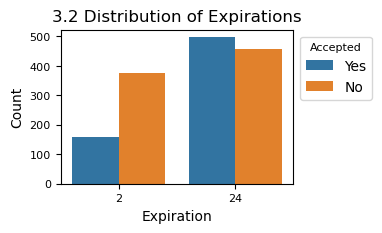

In [52]:
plt.subplots(figsize=(3,2))
plot_3_2 = sns.countplot(exp_rest_coupons, x="expiration", hue="accepted")
plot_3_2.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
sns.move_legend(plot_3_2, "upper left", bbox_to_anchor=(1, 1))
plot_3_2.set(xlabel='Expiration', ylabel='Count', title='3.2 Distribution of Expirations')
plot_3_2.figure.savefig("images/3_2_distribution_expiration.png", bbox_inches='tight')

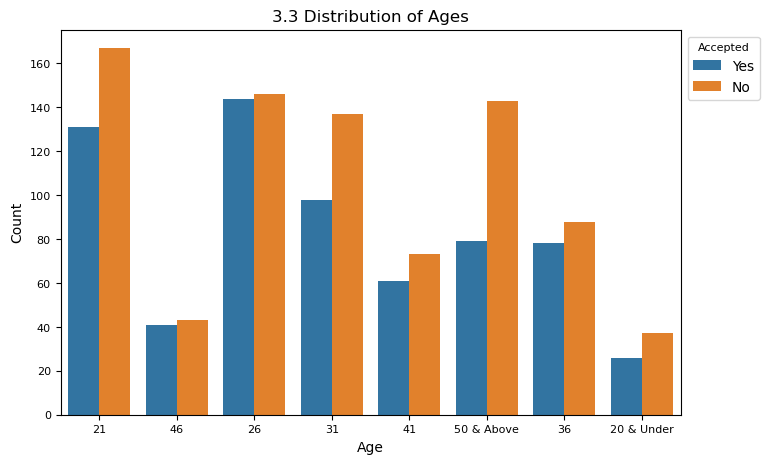

In [53]:
plt.subplots(figsize=(8,5))
plot_3_3 = sns.countplot(exp_rest_coupons, x="age", hue="accepted")
plot_3_3.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
sns.move_legend(plot_3_3, "upper left", bbox_to_anchor=(1, 1))
plot_3_3.set(xlabel='Age', ylabel='Count', title='3.3 Distribution of Ages')
plot_3_3.figure.savefig("images/3_3_distribution_age.png", bbox_inches='tight')

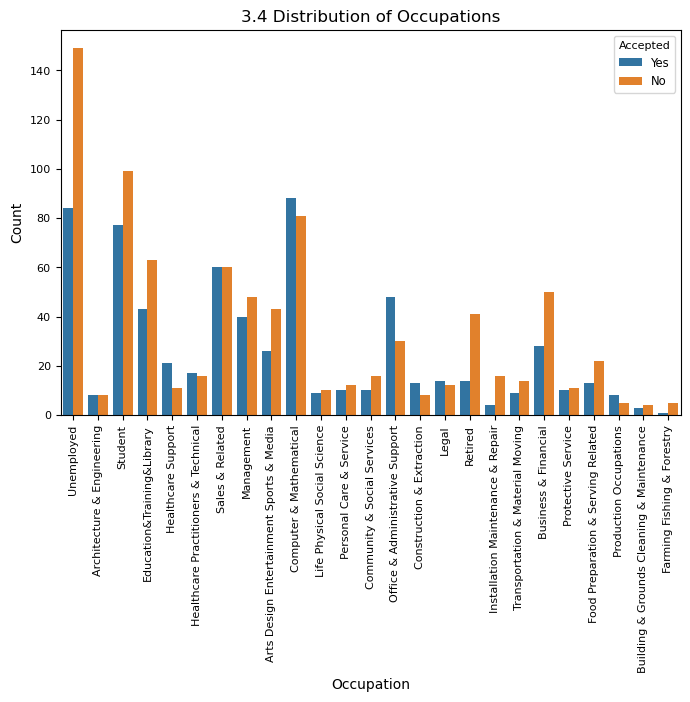

In [54]:
plt.subplots(figsize=(8,5))
plot_3_4 = sns.countplot(exp_rest_coupons, x="occupation", hue="accepted")
plot_3_4.tick_params(labelsize=8)
plt.xticks(rotation=90)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_3_4.set(xlabel='Occupation', ylabel='Count', title='3.4 Distribution of Occupations')
plot_3_4.figure.savefig("images/3_4_distribution_occupation.png", bbox_inches='tight')

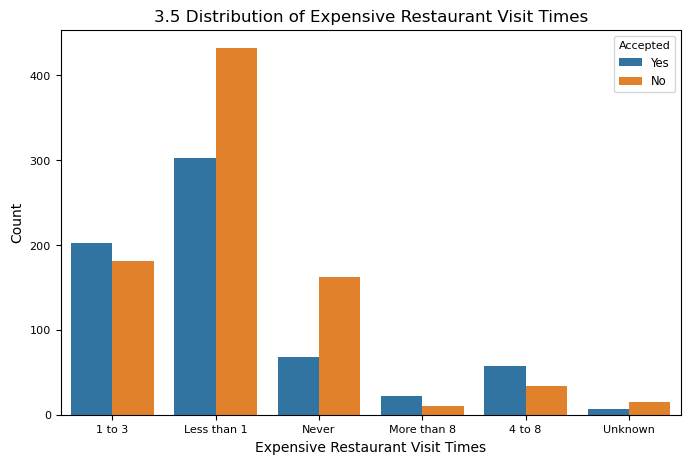

In [55]:
plt.subplots(figsize=(8,5))
plot_3_5 = sns.countplot(exp_rest_coupons, x="restaurant_20to50_times", hue="accepted")
plot_3_5.tick_params(labelsize=8)
plt.legend(title='Accepted', fontsize='small', title_fontsize='8')
plot_3_5.set(xlabel='Expensive Restaurant Visit Times', ylabel='Count', title='3.5 Distribution of Expensive Restaurant Visit Times')
plot_3_5.figure.savefig("images/3_5_distribution_exprestvisits.png", bbox_inches='tight')

Acceptance for expensive restaurant coupons is relatively low. There are few catagorty values with high acceptance rates, but there are several where the acceptance rate is relatelively better:
1. for drivers with friends as passangers. (plot 3.1)
2. in the late morning and afternoon. (plot 3.2)
3. for 1 day expirations over 2 hour expirations. (plot 3.3)
4. for drivers aged about 26 and under. (plot 3.4)
5. for students and those unemployed. (plot 3.5)

In [56]:
# Create a dataframe containing the records where expensive restaurant coupons were accepted
exp_rest_coupons_accepted = exp_rest_coupons.query("accepted == 'Yes'").reset_index()

# Convert the age and expensive restaurant visit times to numeric values
exp_rest_coupons_accepted.age = exp_rest_coupons_accepted.age.replace({'50 & Above': '50', '20 & Under': '20'})
exp_rest_coupons_accepted.age = pd.to_numeric(exp_rest_coupons_accepted.age)
exp_rest_coupons_accepted.restaurant_20to50_times = exp_rest_coupons_accepted.restaurant_20to50_times.replace(
    {'Never': '0', 'Less than 1': '0', '1 to 3': '2', '4 to 8': '6', 'More than 8': '9'})
exp_rest_coupons_accepted = exp_rest_coupons_accepted.drop(exp_rest_coupons_accepted[exp_rest_coupons_accepted['restaurant_20to50_times'] == 'Unknown'].index)
exp_rest_coupons_accepted.restaurant_20to50_times = pd.to_numeric(exp_rest_coupons_accepted.restaurant_20to50_times)

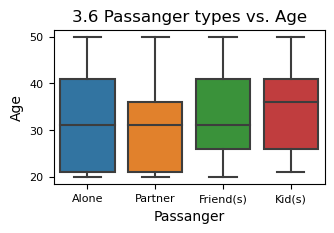

In [57]:
plt.subplots(figsize=(3.5,2))
plot_3_6 = sns.boxplot(exp_rest_coupons_accepted, x='passanger', y='age')
plot_3_6.tick_params(labelsize=8)
plot_3_6.set(xlabel='Passanger', ylabel='Age', title='3.6 Passanger types vs. Age')
plot_3_6.figure.savefig("images/3_6_box_time_age.png", bbox_inches='tight')

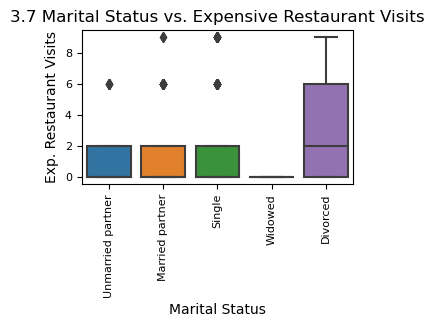

In [58]:
plt.subplots(figsize=(3.5,2))
plot_3_7 = sns.boxplot(exp_rest_coupons_accepted, x='maritalStatus', y='restaurant_20to50_times')
plot_3_7.tick_params(labelsize=8)
plt.xticks(rotation=90)
plot_3_7.set(xlabel='Marital Status', ylabel='Exp. Restaurant Visits', title='3.7 Marital Status vs. Expensive Restaurant Visits')
plot_3_7.figure.savefig("images/3_7_box_maritalStatus_times.png", bbox_inches='tight')

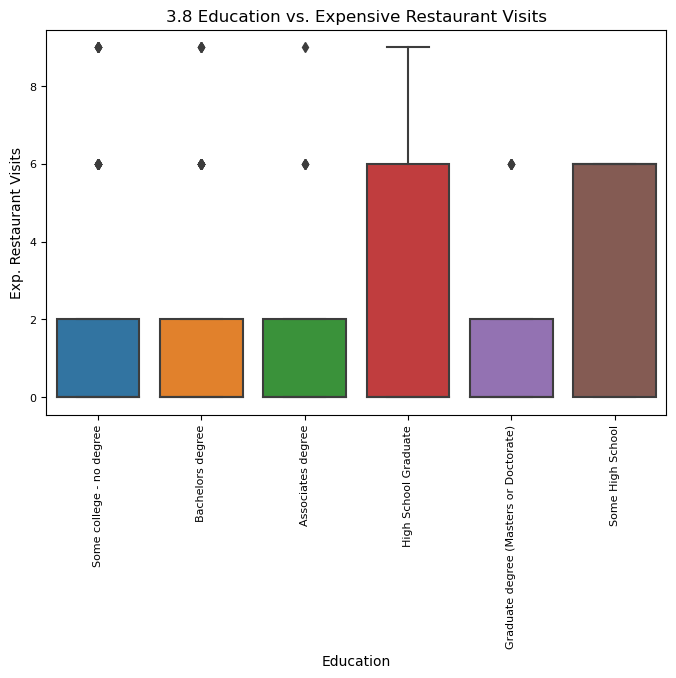

In [59]:
plt.subplots(figsize=(8,5))
plot_3_8 = sns.boxplot(exp_rest_coupons_accepted, x='education', y='restaurant_20to50_times')
plot_3_8.tick_params(labelsize=8)
plt.xticks(rotation=90)
plot_3_8.set(xlabel='Education', ylabel='Exp. Restaurant Visits', title='3.8 Education vs. Expensive Restaurant Visits')
plot_3_8.figure.savefig("images/3_8_box_education_times.png", bbox_inches='tight')

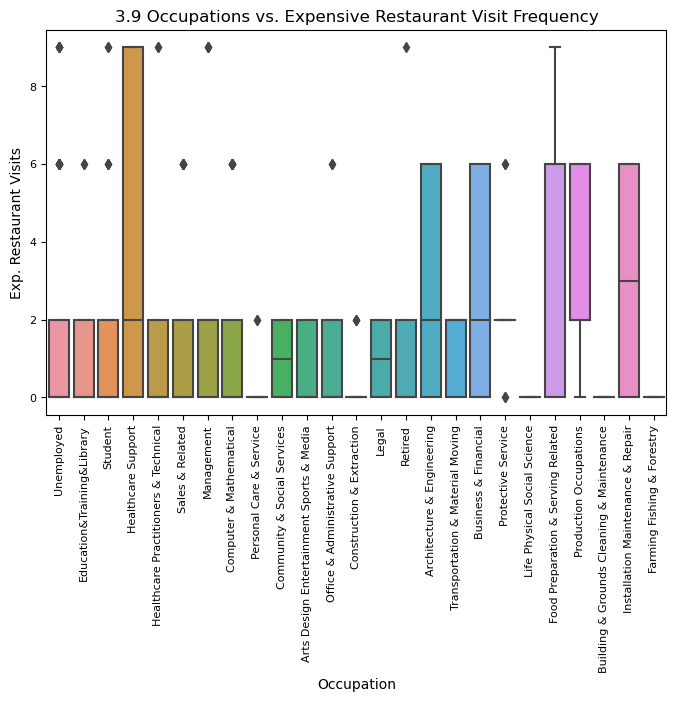

In [60]:
plt.subplots(figsize=(8,5))
plot_3_9 = sns.boxplot(exp_rest_coupons_accepted, x='occupation', y='restaurant_20to50_times')
plot_3_9.tick_params(labelsize=8)
plt.xticks(rotation=90)
plot_3_9.set(xlabel='Occupation', ylabel='Exp. Restaurant Visits', title='3.9 Occupations vs. Expensive Restaurant Visit Frequency')
plot_3_9.figure.savefig("images/3_9_box_occupation_times.png", bbox_inches='tight')

As with drivers that accepted coffee house coupons, we can find relationships between those drivers that accepted expensive restautant coupons. Drivers with friends as passangers tend to be age about 25. Both of these groups were more likely to accept the coffee house coupon (plot 3.6).

Expensive restaurant visits were more likely from several groups including the divorced (plot 3.7), high school or some highschool eduation, and occupations:
1. Healthcare Support
2. Achitecture and Engineering
3. Food Preparation and Service
4. Installation Maintenance and Repair
5. Farming, Fishing, and Forestry

For both coffee houses and expensive restaurants, drivers were more likely to accept coupons that expired in a day rather than those that expired in 2 hours.